<a href="https://colab.research.google.com/github/Yanhuijun1911/PythonData/blob/main/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)

The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the median for each of the 4 size columns
*  calculate the proportion of each column that are on or above median that are of a species (ie proportion of petal-lengths on or above median that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
def stats_iris(df):
  max = df.max()
  min = df.min()
  median = df.median()
  upper_quartie = df.quantile(0.75)
  lower_quartie = df.quantile(0.25)
  
  return max, min, median, upper_quartie, lower_quartie

print('sepal-length: ', stats_iris(iris_data['sepal-length']))
print('sepal-width:', stats_iris(iris_data['sepal-width']))
print('petal-length:', stats_iris(iris_data['petal-length']))
print('petal-width:', stats_iris(iris_data['petal-width']))

sepal-length:  (7.9, 4.3, 5.8, 6.4, 5.1)
sepal-width: (4.4, 2.0, 3.0, 3.3, 2.8)
petal-length: (6.9, 1.0, 4.35, 5.1, 1.6)
petal-width: (2.5, 0.1, 1.3, 1.8, 0.3)


### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [ ]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train, test = train_test_split(iris_data, test_size=0.30)
train.describe()
train.dropna(inplace = True)
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 19 to 108
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  105 non-null    float64
 1   sepal-width   105 non-null    float64
 2   petal-length  105 non-null    float64
 3   petal-width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [ ]:
iris_data.dropna(inplace = True)
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
seplen_mean = iris_data['sepal-length'].mean()
sepwid_mean = iris_data['sepal-width'].mean()
petlen_mean = iris_data['petal-length'].mean()
petwid_mean = iris_data['petal-width'].mean()

def encode_iris(df, **kwds):
  mean = kwds['mean']
  key = kwds['key']
  if df[key] > mean:
    return 1
  else:
    return 0

iris_data['encode_sepal-length'] = iris_data.apply(encode_iris, axis = 1, key = 'sepal-length', mean = seplen_mean)
iris_data['encode_sepal-width'] = iris_data.apply(encode_iris, axis = 1, key = 'sepal-width', mean = sepwid_mean)
iris_data['encode_petal-length'] = iris_data.apply(encode_iris, axis = 1, key = 'petal-length', mean = petlen_mean)
iris_data['encode_petal-width'] = iris_data.apply(encode_iris, axis = 1, key = 'petal-width', mean = petwid_mean)
iris_data['encode_sepal-length'].describe()

count    150.000000
mean       0.466667
std        0.500559
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: encode_sepal-length, dtype: float64

In [ ]:
# get the mean for each column and apply a function to encode into 1 (above mean) and 0 (mean or below mean)
def encode_iris(df, **kwds):
  indicator = kwds['indicator']
  key = kwds['key']
  if df[key] >= indicator:
    return 1
  else:
    return 0


# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode_iris, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())
train['sepal-width'] = train.apply(encode_iris, axis=1, key='sepal-width', indicator=train['sepal-width'].mean())
train['petal-length'] = train.apply(encode_iris, axis=1, key='petal-length', indicator=train['petal-length'].mean())
train['petal-width'] = train.apply(encode_iris, axis=1, key='petal-width', indicator=train['petal-width'].mean())
train


,sepal-length,sepal-width,petal-length,petal-width,species
19,0,1,0,0,Iris-setosa
32,0,1,0,0,Iris-setosa
149,0,0,1,1,Iris-virginica
40,0,1,0,0,Iris-setosa
100,1,1,1,1,Iris-virginica
...,...,...,...,...,...
33,0,1,0,0,Iris-setosa
76,1,0,1,1,Iris-versicolor
0,0,1,0,0,Iris-setosa
65,1,1,1,1,Iris-versicolor


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the median that are NOT Iris-virginica.  Calculate these in the same way



In [ ]:
train.head()

,sepal-length,sepal-width,petal-length,petal-width,species
19,0,1,0,0,Iris-setosa
32,0,1,0,0,Iris-setosa
149,0,0,1,1,Iris-virginica
40,0,1,0,0,Iris-setosa
100,1,1,1,1,Iris-virginica


In [ ]:
# calculate the proportion of results where the value is on or above mean that are of the species Iris-virginica
def get_prop(df, column):
  df1 = df[(df[column] == 1) & (df['species'] == 'Iris-virginica')]
  df_all = df[df[column] == 1]
  prop = df1[column].count() / df_all[column].count()
  return  prop

virginica_sep_len_abo = get_prop(train, 'sepal-length')
virginica_sep_wid_abo = get_prop(train, 'sepal-width')
virginica_pet_len_abo = get_prop(train, 'petal-length')
virginica_pet_wid_abo = get_prop(train, 'petal-width')

print('the probability of sepal-length on or above in Iris-virginica:', virginica_sep_len_abo)
print('the probability of sepal-width on or above in Iris-virginica:', virginica_sep_wid_abo)
print('the probability of petal-length on or above in Iris-virginica:', virginica_pet_len_abo)
print('the probability of petal-width on or above in Iris-virginica:', virginica_pet_wid_abo)


the probability of sepal-length on or above in Iris-virginica: 0.6346153846153846
the probability of sepal-width on or above in Iris-virginica: 0.28888888888888886
the probability of petal-length on or above in Iris-virginica: 0.5373134328358209
the probability of petal-width on or above in Iris-virginica: 0.5714285714285714


### Exercise 5 - Calculate the proportion of each column where the value is below median that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [ ]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica
def get_prop_below(df, column):
  df1 = df[(df[column] == 0) & (df['species'] == 'Iris-virginica')]
  df_all = df[df[column] == 0]
  prop = df1[column].count() / df_all[column].count()
  return  prop

virginica_sep_len_below = get_prop_below(train, 'sepal-length')
virginica_sep_wid_below = get_prop_below(train, 'sepal-width')
virginica_pet_len_below = get_prop_below(train, 'petal-length')
virginica_pet_wid_below = get_prop_below(train, 'petal-width')

print('the probability of sepal-length below in Iris-virginica:', virginica_sep_len_below)
print('the probability of sepal-width below in Iris-virginica:', virginica_sep_wid_below)
print('the probability of petal-length below in Iris-virginica:', virginica_pet_len_below)
print('the probability of petal-width below in Iris-virginica:', virginica_pet_wid_below)



the probability of sepal-length below in Iris-virginica: 0.05660377358490566
the probability of sepal-width below in Iris-virginica: 0.38333333333333336
the probability of petal-length below in Iris-virginica: 0.0
the probability of petal-width below in Iris-virginica: 0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [ ]:
def get_prop_abo(df, column, species):
  df1 = df[(df[column] == 1) & (df['species'] == species)]
  df_all = df[df[column] == 1]
  prop = df1[column].count() / df_all[column].count()
  return  prop

def get_prop_below(df, column, species):
  df1 = df[(df[column] == 0) & (df['species'] == species )]
  df_all = df[df[column] == 0]
  prop = df1[column].count() / df_all[column].count()
  return  prop



In [ ]:
# 'Iris-setosa' on or above
setosa_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-setosa')
setosa_sep_wid_abo = get_prop_abo(train, 'sepal-width', 'Iris-setosa')
setosa_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-setosa')

print('the probability of sepal-length on or above in Iris-setosa:', setosa_sep_len_abo)
print('the probability of sepal-width on or above in Iris-setosa:', setosa_sep_wid_abo)
print('the probability of petal-length on or above in Iris-setosa:', setosa_pet_len_abo)
print('the probability of petal-width on or above in Iris-setosa:', setosa_pet_wid_abo)

#'Iris-setosa' below
setosa_sep_len_below = get_prop_below(train, 'sepal-length','Iris-setosa')
setosa_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-setosa')
setosa_pet_len_below = get_prop_below(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_below = get_prop_below(train, 'petal-width', 'Iris-setosa')

print('the probability of sepal-length below in Iris-setosa:', setosa_sep_len_below)
print('the probability of sepal-width below in Iris-setosa:', setosa_sep_wid_below)
print('the probability of petal-length below in Iris-setosa:', setosa_pet_len_below)
print('the probability of petal-width below in Iris-setosa:', setosa_pet_wid_below)


the probability of sepal-length on or above in Iris-setosa: 0.0
the probability of sepal-width on or above in Iris-setosa: 0.5777777777777777
the probability of petal-length on or above in Iris-setosa: 0.0
the probability of petal-width on or above in Iris-setosa: 0.0
the probability of sepal-length below in Iris-setosa: 0.5849056603773585
the probability of sepal-width below in Iris-setosa: 0.08333333333333333
the probability of petal-length below in Iris-setosa: 0.8157894736842105
the probability of petal-width below in Iris-setosa: 0.7380952380952381


In [ ]:
#versicolor on or above
versi_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-versicolor')
versi_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-versicolor')
versi_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-versicolor')
versi_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-versicolor')

print('the probability of sepal-length on or above in Iris-versicolor:', versi_sep_len_abo)
print('the probability of sepal-width on or above in Iris-versicolor:', versi_sep_wid_abo)
print('the probability of petal-length on or above in Iris-versicolor:', versi_pet_len_abo)
print('the probability of petal-width on or above in Iris-versicolor:', versi_pet_wid_abo)

#versicolor below
versi_sep_len_below = get_prop_below(train, 'sepal-length','Iris-versicolor')
versi_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-versicolor')
versi_pet_len_below = get_prop_below(train, 'petal-length','Iris-versicolor')
versi_pet_wid_below = get_prop_below(train, 'petal-width','Iris-versicolor')

print('the probability of sepal-length below in Iris-versicolor:', versi_sep_len_below)
print('the probability of sepal-width below in Iris-versicolor:', versi_sep_wid_below)
print('the probability of petal-length below in Iris-versicolor:', versi_pet_len_below)
print('the probability of petal-width below in Iris-versicolor:', versi_pet_wid_below)



the probability of sepal-length on or above in Iris-versicolor: 0.36538461538461536
the probability of sepal-width on or above in Iris-versicolor: 0.13333333333333333
the probability of petal-length on or above in Iris-versicolor: 0.4626865671641791
the probability of petal-width on or above in Iris-versicolor: 0.42857142857142855
the probability of sepal-length below in Iris-versicolor: 0.3584905660377358
the probability of sepal-width below in Iris-versicolor: 0.5333333333333333
the probability of petal-length below in Iris-versicolor: 0.18421052631578946
the probability of petal-width below in Iris-versicolor: 0.2619047619047619


### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [ ]:
# show which columns are reliable predictors
sep_len_abo = [virginica_sep_len_abo,setosa_sep_len_abo, versi_sep_len_abo ]
sep_wid_abo = [virginica_sep_wid_abo,setosa_sep_wid_abo, versi_sep_wid_abo ]
pet_len_abo = [virginica_pet_len_abo,setosa_pet_len_abo, versi_pet_len_abo ]
pet_wid_abo = [virginica_pet_wid_abo,setosa_pet_wid_abo, versi_pet_wid_abo ]

sep_len_below = [virginica_sep_len_below,setosa_sep_len_below, versi_sep_len_below ]
sep_wid_below = [virginica_sep_wid_below,setosa_sep_wid_below, versi_sep_wid_below ]
pet_len_below = [virginica_pet_len_below,setosa_pet_len_below, versi_pet_len_below]
pet_wid_below = [virginica_pet_wid_below,setosa_pet_wid_below, versi_pet_wid_below ]

iris_predict = pd.DataFrame([sep_len_abo,sep_wid_abo,pet_len_abo,pet_wid_abo,sep_len_below,sep_wid_below,pet_len_below,pet_wid_below])
iris_predict.index = ['sep_len_abo','sep_wid_abo','pet_len_abo','pet_wid_abo','sep_len_below','sep_wid_below','pet_len_below','pet_wid_below']
iris_predict.columns = ['Iris-virginica', 'Iris-setosa','Iris-versicolor']
iris_predict

,Iris-virginica,Iris-setosa,Iris-versicolor
sep_len_abo,0.634615,0.000000,0.365385
sep_wid_abo,0.288889,0.577778,0.133333
pet_len_abo,0.537313,0.000000,0.462687
pet_wid_abo,0.571429,0.000000,0.428571
sep_len_below,0.056604,0.584906,0.358491
sep_wid_below,0.383333,0.083333,0.533333
pet_len_below,0.000000,0.815789,0.184211
pet_wid_below,0.000000,0.738095,0.261905


if
petal-wid >= mean (1) & petal-len (1) >= mean 
--- virginica

if 
petal-wid < mean & petal len < mean & sep-len < mean 
==== setosa



virginica: petal lenth & petal wid are larger than the mean of each.
setosa: petal length & petal width & sep length are smaller than the mean of each.


In [ ]:
def predict_value(df, column):
  index = df.index
  n = 0
  for value in df[column]:
    n = n+1
    if value >= 0.5:
      print('reliable:', value, column, index[n-1],)
    else:
      print('not reliable')

  return 

predict_value(iris_predict, 'Iris-virginica' )
predict_value(iris_predict, 'Iris-setosa' )
predict_value(iris_predict, 'Iris-versicolor' )
  
 

reliable: 0.6346153846153846 Iris-virginica sep_len_abo
not reliable
reliable: 0.5373134328358209 Iris-virginica pet_len_abo
reliable: 0.5714285714285714 Iris-virginica pet_wid_abo
not reliable
not reliable
not reliable
not reliable
not reliable
reliable: 0.5777777777777777 Iris-setosa sep_wid_abo
not reliable
not reliable
reliable: 0.5849056603773585 Iris-setosa sep_len_below
not reliable
reliable: 0.8157894736842105 Iris-setosa pet_len_below
reliable: 0.7380952380952381 Iris-setosa pet_wid_below
not reliable
not reliable
not reliable
not reliable
not reliable
reliable: 0.5333333333333333 Iris-versicolor sep_wid_below
not reliable
not reliable


In [ ]:
# decision tree

def get_decision_tree(df):
  if df['petal-width'] == 0 and df['petal-length'] == 0:
    return 'Iris-virginica'
    if df['petal-length'] == 1 and df['petal-width'] == 1 and df['sepal-length'] == 1:
      return 'Iris-setosa'
         
  return 'Iris-versicolor'

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 



Proportion correctly identified 0.3111111111111111


### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




In [ ]:
def get_species(df):
  # ADD CODE HERE TO RETURN None if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if df['petal-width'] == 0:
        return None
        if df['petal-length'] == 0:
            return None
          
    return 'Iris-virginica' 

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.3111111111111111


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [215]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)



In [216]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train_1, test = train_test_split(iris_data, test_size=0.30)
train.dropna(inplace = True)


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


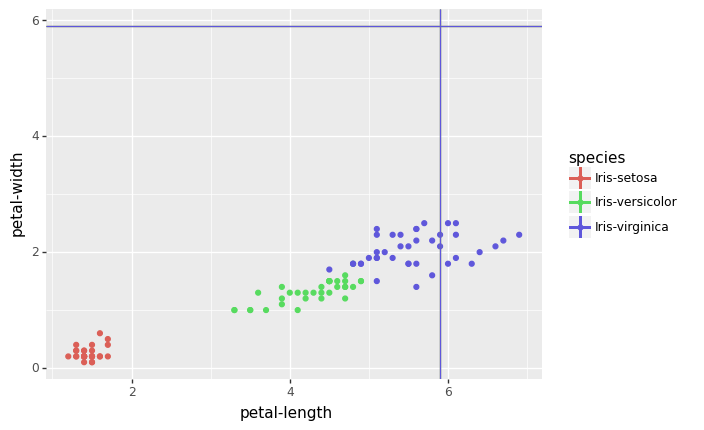

<ggplot: (8781212316761)>

In [222]:
from plotnine import *
ggplot(train_1, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train_1, aes(xintercept=train_1['sepal-length'].median(), color='species')) + geom_hline(train_1, aes(yintercept=train_1['sepal-length'].median(), color='species'))

In [218]:
def encode_iris(df, **kwds):
  indicator = kwds['indicator']
  key = kwds['key']
  if df[key] >= indicator:
    return 1
  else:
    return 0

train = train_1.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode_iris, axis=1, key='sepal-length', indicator=train['sepal-length'].median())
train['sepal-width'] = train.apply(encode_iris, axis=1, key='sepal-width', indicator=train['sepal-width'].median())
train['petal-length'] = train.apply(encode_iris, axis=1, key='petal-length', indicator=train['petal-length'].median())
train['petal-width'] = train.apply(encode_iris, axis=1, key='petal-width', indicator=train['petal-width'].median())



In [219]:
def get_prop_abo(df, column, species):
  df1 = df[(df[column] == 1) & (df['species'] == species)]
  df_all = df[df[column] == 1]
  prop = df1[column].count() / df_all[column].count()
  return  prop

def get_prop_below(df, column, species):
  df1 = df[(df[column] == 0) & (df['species'] == species )]
  df_all = df[df[column] == 0]
  prop = df1[column].count() / df_all[column].count()
  return  prop



In [220]:
# 'Iris-setosa' on or above
setosa_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-setosa')
setosa_sep_wid_abo = get_prop_abo(train, 'sepal-width', 'Iris-setosa')
setosa_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-setosa')

#'Iris-setosa' below
setosa_sep_len_below = get_prop_below(train, 'sepal-length','Iris-setosa')
setosa_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-setosa')
setosa_pet_len_below = get_prop_below(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_below = get_prop_below(train, 'petal-width', 'Iris-setosa')

#versicolor on or above
versi_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-versicolor')
versi_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-versicolor')
versi_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-versicolor')
versi_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-versicolor')

#versicolor below
versi_sep_len_below = get_prop_below(train, 'sepal-length','Iris-versicolor')
versi_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-versicolor')
versi_pet_len_below = get_prop_below(train, 'petal-length','Iris-versicolor')
versi_pet_wid_below = get_prop_below(train, 'petal-width','Iris-versicolor')

#virginica on or above
virginica_sep_len_abo = get_prop_abo(train, 'sepal-length','Iris-virginica')
virginica_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-virginica')
virginica_pet_len_abo = get_prop_abo(train, 'petal-length','Iris-virginica')
virginica_pet_wid_abo = get_prop_abo(train, 'petal-width','Iris-virginica')

#virginica below
virginica_sep_len_below = get_prop_below(train, 'sepal-length', 'Iris-virginica')
virginica_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-virginica')
virginica_pet_len_below = get_prop_below(train, 'petal-length','Iris-virginica')
virginica_pet_wid_below = get_prop_below(train, 'petal-width','Iris-virginica')


In [221]:
sep_len_abo = [virginica_sep_len_abo,setosa_sep_len_abo, versi_sep_len_abo ]
sep_wid_abo = [virginica_sep_wid_abo,setosa_sep_wid_abo, versi_sep_wid_abo ]
pet_len_abo = [virginica_pet_len_abo,setosa_pet_len_abo, versi_pet_len_abo ]
pet_wid_abo = [virginica_pet_wid_abo,setosa_pet_wid_abo, versi_pet_wid_abo ]

sep_len_below = [virginica_sep_len_below,setosa_sep_len_below, versi_sep_len_below ]
sep_wid_below = [virginica_sep_wid_below,setosa_sep_wid_below, versi_sep_wid_below ]
pet_len_below = [virginica_pet_len_below,setosa_pet_len_below, versi_pet_len_below]
pet_wid_below = [virginica_pet_wid_below,setosa_pet_wid_below, versi_pet_wid_below ]

iris_predict = pd.DataFrame([sep_len_abo,sep_wid_abo,pet_len_abo,pet_wid_abo,sep_len_below,sep_wid_below,pet_len_below,pet_wid_below])
iris_predict.index = ['sep_len_abo','sep_wid_abo','pet_len_abo','pet_wid_abo','sep_len_below','sep_wid_below','pet_len_below','pet_wid_below']
iris_predict.columns = ['Iris-virginica', 'Iris-setosa','Iris-versicolor']
iris_predict

,Iris-virginica,Iris-setosa,Iris-versicolor
sep_len_abo,0.679245,0.000000,0.320755
sep_wid_abo,0.384615,0.430769,0.184615
pet_len_abo,0.701754,0.000000,0.298246
pet_wid_abo,0.701754,0.000000,0.298246
sep_len_below,0.076923,0.576923,0.346154
sep_wid_below,0.375000,0.050000,0.575000
pet_len_below,0.000000,0.625000,0.375000
pet_wid_below,0.000000,0.625000,0.375000


What do you notice? (write your answer here)

It is the same as Mean.

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

In [223]:
#upper quantile

train = train_1.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode_iris, axis=1, key='sepal-length', indicator=train['sepal-length'].quantile(0.75))
train['sepal-width'] = train.apply(encode_iris, axis=1, key='sepal-width', indicator=train['sepal-width'].quantile(0.75))
train['petal-length'] = train.apply(encode_iris, axis=1, key='petal-length', indicator=train['petal-length'].quantile(0.75))
train['petal-width'] = train.apply(encode_iris, axis=1, key='petal-width', indicator=train['petal-width'].quantile(0.75))


In [224]:
# 'Iris-setosa' on or above
setosa_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-setosa')
setosa_sep_wid_abo = get_prop_abo(train, 'sepal-width', 'Iris-setosa')
setosa_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-setosa')

#'Iris-setosa' below
setosa_sep_len_below = get_prop_below(train, 'sepal-length','Iris-setosa')
setosa_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-setosa')
setosa_pet_len_below = get_prop_below(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_below = get_prop_below(train, 'petal-width', 'Iris-setosa')

#versicolor on or above
versi_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-versicolor')
versi_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-versicolor')
versi_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-versicolor')
versi_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-versicolor')

#versicolor below
versi_sep_len_below = get_prop_below(train, 'sepal-length','Iris-versicolor')
versi_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-versicolor')
versi_pet_len_below = get_prop_below(train, 'petal-length','Iris-versicolor')
versi_pet_wid_below = get_prop_below(train, 'petal-width','Iris-versicolor')

#virginica on or above
virginica_sep_len_abo = get_prop_abo(train, 'sepal-length','Iris-virginica')
virginica_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-virginica')
virginica_pet_len_abo = get_prop_abo(train, 'petal-length','Iris-virginica')
virginica_pet_wid_abo = get_prop_abo(train, 'petal-width','Iris-virginica')

#virginica below
virginica_sep_len_below = get_prop_below(train, 'sepal-length', 'Iris-virginica')
virginica_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-virginica')
virginica_pet_len_below = get_prop_below(train, 'petal-length','Iris-virginica')
virginica_pet_wid_below = get_prop_below(train, 'petal-width','Iris-virginica')


In [225]:
sep_len_abo = [virginica_sep_len_abo,setosa_sep_len_abo, versi_sep_len_abo ]
sep_wid_abo = [virginica_sep_wid_abo,setosa_sep_wid_abo, versi_sep_wid_abo ]
pet_len_abo = [virginica_pet_len_abo,setosa_pet_len_abo, versi_pet_len_abo ]
pet_wid_abo = [virginica_pet_wid_abo,setosa_pet_wid_abo, versi_pet_wid_abo ]

sep_len_below = [virginica_sep_len_below,setosa_sep_len_below, versi_sep_len_below ]
sep_wid_below = [virginica_sep_wid_below,setosa_sep_wid_below, versi_sep_wid_below ]
pet_len_below = [virginica_pet_len_below,setosa_pet_len_below, versi_pet_len_below]
pet_wid_below = [virginica_pet_wid_below,setosa_pet_wid_below, versi_pet_wid_below ]

iris_predict = pd.DataFrame([sep_len_abo,sep_wid_abo,pet_len_abo,pet_wid_abo,sep_len_below,sep_wid_below,pet_len_below,pet_wid_below])
iris_predict.index = ['sep_len_abo','sep_wid_abo','pet_len_abo','pet_wid_abo','sep_len_below','sep_wid_below','pet_len_below','pet_wid_below']
iris_predict.columns = ['Iris-virginica', 'Iris-setosa','Iris-versicolor']
iris_predict

,Iris-virginica,Iris-setosa,Iris-versicolor
sep_len_abo,0.777778,0.000000,0.222222
sep_wid_abo,0.305556,0.583333,0.111111
pet_len_abo,1.000000,0.000000,0.000000
pet_wid_abo,1.000000,0.000000,0.000000
sep_len_below,0.243590,0.384615,0.371795
sep_wid_below,0.420290,0.130435,0.449275
pet_len_below,0.166667,0.384615,0.448718
pet_wid_below,0.166667,0.384615,0.448718


If petal length and the petal width are both greater than upper quantile, it is virginica. 

If septal lenth, petal length, and petal width are all smaller than upper quantile, it is setosa.

The rest is versicolor.

In [229]:
# decision tree

def get_decision_tree(df):
  if df['petal-width'] == 1 and df['petal-length'] == 1:
    return 'Iris-virginica'
    if df['petal-length'] == 0 and df['petal-width'] == 0 and df['sepal-length'] == 0:
      return 'Iris-setosa'
         
  return 'Iris-versicolor'

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 



Proportion correctly identified 0.4444444444444444


In [231]:
#lower quantile

train = train_1.copy()
# run the function for each column so that each of the four columns are encoded, then drop the original columns, saving as a new dataframe
train['sepal-length'] = train.apply(encode_iris, axis=1, key='sepal-length', indicator=train['sepal-length'].quantile(0.25))
train['sepal-width'] = train.apply(encode_iris, axis=1, key='sepal-width', indicator=train['sepal-width'].quantile(0.25))
train['petal-length'] = train.apply(encode_iris, axis=1, key='petal-length', indicator=train['petal-length'].quantile(0.25))
train['petal-width'] = train.apply(encode_iris, axis=1, key='petal-width', indicator=train['petal-width'].quantile(0.25))


In [232]:
# 'Iris-setosa' on or above
setosa_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-setosa')
setosa_sep_wid_abo = get_prop_abo(train, 'sepal-width', 'Iris-setosa')
setosa_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-setosa')

#'Iris-setosa' below
setosa_sep_len_below = get_prop_below(train, 'sepal-length','Iris-setosa')
setosa_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-setosa')
setosa_pet_len_below = get_prop_below(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_below = get_prop_below(train, 'petal-width', 'Iris-setosa')

#versicolor on or above
versi_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-versicolor')
versi_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-versicolor')
versi_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-versicolor')
versi_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-versicolor')

#versicolor below
versi_sep_len_below = get_prop_below(train, 'sepal-length','Iris-versicolor')
versi_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-versicolor')
versi_pet_len_below = get_prop_below(train, 'petal-length','Iris-versicolor')
versi_pet_wid_below = get_prop_below(train, 'petal-width','Iris-versicolor')

#virginica on or above
virginica_sep_len_abo = get_prop_abo(train, 'sepal-length','Iris-virginica')
virginica_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-virginica')
virginica_pet_len_abo = get_prop_abo(train, 'petal-length','Iris-virginica')
virginica_pet_wid_abo = get_prop_abo(train, 'petal-width','Iris-virginica')

#virginica below
virginica_sep_len_below = get_prop_below(train, 'sepal-length', 'Iris-virginica')
virginica_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-virginica')
virginica_pet_len_below = get_prop_below(train, 'petal-length','Iris-virginica')
virginica_pet_wid_below = get_prop_below(train, 'petal-width','Iris-virginica')


In [233]:
sep_len_abo = [virginica_sep_len_abo,setosa_sep_len_abo, versi_sep_len_abo ]
sep_wid_abo = [virginica_sep_wid_abo,setosa_sep_wid_abo, versi_sep_wid_abo ]
pet_len_abo = [virginica_pet_len_abo,setosa_pet_len_abo, versi_pet_len_abo ]
pet_wid_abo = [virginica_pet_wid_abo,setosa_pet_wid_abo, versi_pet_wid_abo ]

sep_len_below = [virginica_sep_len_below,setosa_sep_len_below, versi_sep_len_below ]
sep_wid_below = [virginica_sep_wid_below,setosa_sep_wid_below, versi_sep_wid_below ]
pet_len_below = [virginica_pet_len_below,setosa_pet_len_below, versi_pet_len_below]
pet_wid_below = [virginica_pet_wid_below,setosa_pet_wid_below, versi_pet_wid_below ]

iris_predict = pd.DataFrame([sep_len_abo,sep_wid_abo,pet_len_abo,pet_wid_abo,sep_len_below,sep_wid_below,pet_len_below,pet_wid_below])
iris_predict.index = ['sep_len_abo','sep_wid_abo','pet_len_abo','pet_wid_abo','sep_len_below','sep_wid_below','pet_len_below','pet_wid_below']
iris_predict.columns = ['Iris-virginica', 'Iris-setosa','Iris-versicolor']
iris_predict

,Iris-virginica,Iris-setosa,Iris-versicolor
sep_len_abo,0.493671,0.113924,0.392405
sep_wid_abo,0.395062,0.358025,0.246914
pet_len_abo,0.493827,0.074074,0.432099
pet_wid_abo,0.500000,0.062500,0.437500
sep_len_below,0.038462,0.807692,0.153846
sep_wid_below,0.333333,0.041667,0.625000
pet_len_below,0.000000,1.000000,0.000000
pet_wid_below,0.000000,1.000000,0.000000


If petal length and petal width are both smaller than lower quantile, it is setosa.

If sepal width is smaller than lower quantile, it is versicolor.

If petal width is greater than lower quantile, it is virginica.

In [234]:
# decision tree

def get_decision_tree(df):
  if df['petal-width'] == 0 and df['petal-length'] == 0:
    return 'Iris-setosa'
    if df['petal-width'] == 1:
      return 'virginica'
         
  return 'Iris-versicolor'

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
  species = get_species(test.iloc[i])
  if species == test.iloc[i]['species']:
      correct += 1

print ("Proportion correctly identified", correct / test_size) 


Proportion correctly identified 0.4444444444444444


In [ ]:
#It seems like that upper quantile is more likely to precit the results accurately.

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

Write your answers here:  

In [238]:
train = train_1.copy()
train['sepal-length'] = train.apply(encode_iris, axis=1, key='sepal-length', indicator=train['sepal-length'].mean())
train['sepal-width'] = train.apply(encode_iris, axis=1, key='sepal-width', indicator=train['sepal-width'].mean())
train['petal-length'] = train.apply(encode_iris, axis=1, key='petal-length', indicator=train['petal-length'].mean())
train['petal-width'] = train.apply(encode_iris, axis=1, key='petal-width', indicator=train['petal-width'].mean())



In [239]:
# 'Iris-setosa' on or above
setosa_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-setosa')
setosa_sep_wid_abo = get_prop_abo(train, 'sepal-width', 'Iris-setosa')
setosa_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-setosa')

#'Iris-setosa' below
setosa_sep_len_below = get_prop_below(train, 'sepal-length','Iris-setosa')
setosa_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-setosa')
setosa_pet_len_below = get_prop_below(train, 'petal-length', 'Iris-setosa')
setosa_pet_wid_below = get_prop_below(train, 'petal-width', 'Iris-setosa')

#versicolor on or above
versi_sep_len_abo = get_prop_abo(train, 'sepal-length', 'Iris-versicolor')
versi_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-versicolor')
versi_pet_len_abo = get_prop_abo(train, 'petal-length', 'Iris-versicolor')
versi_pet_wid_abo = get_prop_abo(train, 'petal-width', 'Iris-versicolor')

#versicolor below
versi_sep_len_below = get_prop_below(train, 'sepal-length','Iris-versicolor')
versi_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-versicolor')
versi_pet_len_below = get_prop_below(train, 'petal-length','Iris-versicolor')
versi_pet_wid_below = get_prop_below(train, 'petal-width','Iris-versicolor')

#virginica on or above
virginica_sep_len_abo = get_prop_abo(train, 'sepal-length','Iris-virginica')
virginica_sep_wid_abo = get_prop_abo(train, 'sepal-width','Iris-virginica')
virginica_pet_len_abo = get_prop_abo(train, 'petal-length','Iris-virginica')
virginica_pet_wid_abo = get_prop_abo(train, 'petal-width','Iris-virginica')

#virginica below
virginica_sep_len_below = get_prop_below(train, 'sepal-length', 'Iris-virginica')
virginica_sep_wid_below = get_prop_below(train, 'sepal-width','Iris-virginica')
virginica_pet_len_below = get_prop_below(train, 'petal-length','Iris-virginica')
virginica_pet_wid_below = get_prop_below(train, 'petal-width','Iris-virginica')


In [240]:
sep_len_abo = [virginica_sep_len_abo,setosa_sep_len_abo, versi_sep_len_abo ]
sep_wid_abo = [virginica_sep_wid_abo,setosa_sep_wid_abo, versi_sep_wid_abo ]
pet_len_abo = [virginica_pet_len_abo,setosa_pet_len_abo, versi_pet_len_abo ]
pet_wid_abo = [virginica_pet_wid_abo,setosa_pet_wid_abo, versi_pet_wid_abo ]

sep_len_below = [virginica_sep_len_below,setosa_sep_len_below, versi_sep_len_below ]
sep_wid_below = [virginica_sep_wid_below,setosa_sep_wid_below, versi_sep_wid_below ]
pet_len_below = [virginica_pet_len_below,setosa_pet_len_below, versi_pet_len_below]
pet_wid_below = [virginica_pet_wid_below,setosa_pet_wid_below, versi_pet_wid_below ]

iris_predict = pd.DataFrame([sep_len_abo,sep_wid_abo,pet_len_abo,pet_wid_abo,sep_len_below,sep_wid_below,pet_len_below,pet_wid_below])
iris_predict.index = ['sep_len_abo','sep_wid_abo','pet_len_abo','pet_wid_abo','sep_len_below','sep_wid_below','pet_len_below','pet_wid_below']
iris_predict.columns = ['Iris-virginica', 'Iris-setosa','Iris-versicolor']
iris_predict

,Iris-virginica,Iris-setosa,Iris-versicolor
sep_len_abo,0.692308,0.000000,0.307692
sep_wid_abo,0.319149,0.531915,0.148936
pet_len_abo,0.606061,0.000000,0.393939
pet_wid_abo,0.625000,0.000000,0.375000
sep_len_below,0.075472,0.566038,0.358491
sep_wid_below,0.431034,0.086207,0.482759
pet_len_below,0.000000,0.769231,0.230769
pet_wid_below,0.000000,0.731707,0.268293


The mean is not that accurate to predict versicolor. 

Since no value is greater than 0.5.


# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

In [ ]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))

In [ ]:
from sklearn.model_selection import train_test_split

# create the classification variables from the all columns
train_1, test = train_test_split(iris_data, test_size=0.30)
train.dropna(inplace = True)

#Reflection

Need to get more familiar with encode function especially with the keywords.

It took more time to think about the probability and the relationship with how to classify the decision tree. 

The plot is easier to see the classification. It can be used to exam the decision tree.